# Sato-Tate Simulations

Simulates and plots random second moments based on the Sato-Tate distribution to see if biased random moments are visually different from unbiased ones. 

Authors: Aditya Jambhale and Chris Yao

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import pandas as pd
import time
import json

data_path = "data"
image_path = 'images'

df = pd.read_csv(f"{data_path}/primes.txt", index_col = False, header=None)
df.loc[-1] = [2]  # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
primes = df[0]

def f(x): # cdf of Sato-Tate
    return (x/2 - (1/4)*np.sin(2*x))*(2/np.pi)

def findroot(x):
    a = 0
    b = np.pi
    c = np.pi/2
    while abs(f(c) - x) > .00001:
        if (f(c)-x)*(f(b)-x) < 0:
            a = c
        else: 
            b = c
        c = (a + b) / 2
    return c

def randomST():
    a = rand.random()
    return findroot(a)

def randomMoment(prime):
    return 2*np.sqrt(prime)*np.cos(randomST())

## Testing Sato-Tate Generator

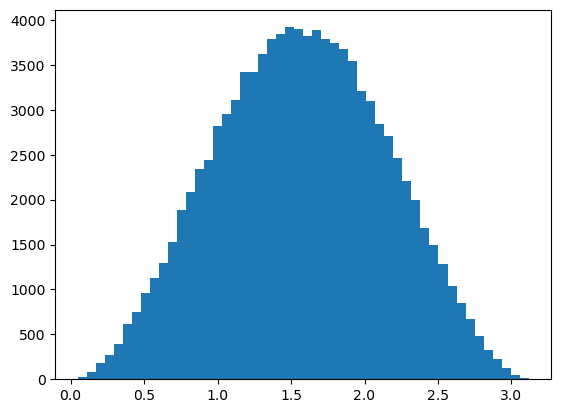

In [6]:
n = 100000
x = [randomST() for j in range(n)]
plt.hist(x, bins = 50)
plt.show()

## Elliptic Curve Moments Simulation

### Generating Random Second Moments

In [16]:
n = 2000
rand2ndMoments = []
start = time.time()

for i, prime in enumerate(primes[:n]):
    A = []
    for j in range(prime):
       A.append(randomMoment(prime))
    rand2ndMoments.append(np.sum(np.power(A, 2)))
    if i % (n // 10) == 0:
        print(f"{i}/{n} of the way done.")
end = time.time()
print(f"Calculation took {round(end - start, 2)} seconds.")
with open(f"{data_path}/rand2ndmoments.txt", "w") as f:
    f.write(json.dumps(rand2ndMoments))

0/100 of the way done.
10/100 of the way done.
20/100 of the way done.
30/100 of the way done.
40/100 of the way done.
50/100 of the way done.
60/100 of the way done.
70/100 of the way done.
80/100 of the way done.
90/100 of the way done.
Calculation took 1.91 seconds.


### Plotting Biases


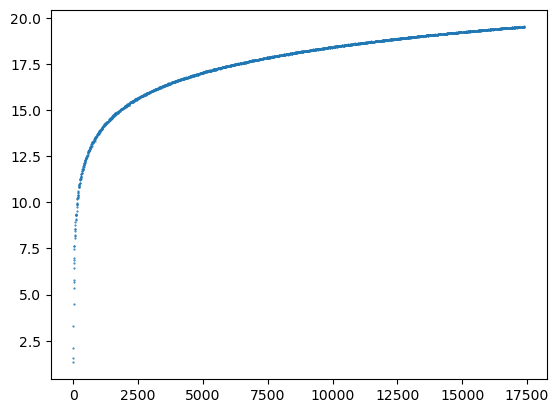

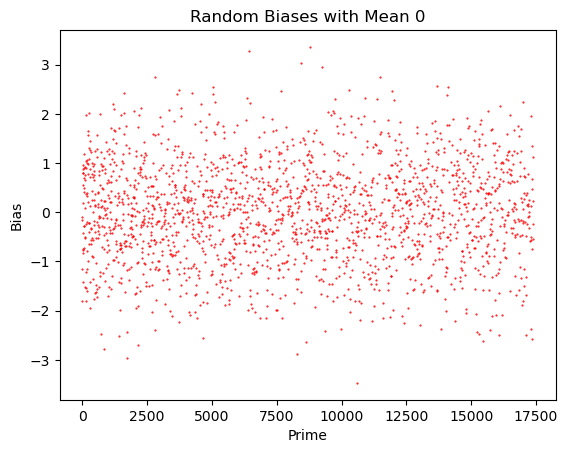

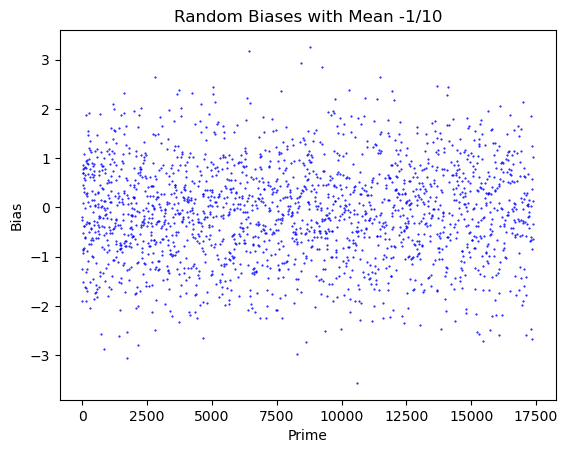

In [32]:
with open(f"{data_path}/rand2ndmoments.txt", "r") as f:
    rand2ndMoments = json.loads(f.read())

plt.scatter(primes[:n], np.log(rand2ndMoments), marker = '.', s= 1)
plt.show()


biased2ndMoments = [rand2ndMoments[j] - (.1)*primes[j]**(1.5) for j in range(n)]
bias = (rand2ndMoments - np.power(primes[:n], 2))/np.power(primes[:n], 1.5)
bias2 = (biased2ndMoments - np.power(primes[:n], 2))/np.power(primes[:n], 1.5)
plt.scatter(primes[:n], bias, marker = '.', color="red", s=1)
plt.title('Random Biases with Mean 0')
plt.xlabel("Prime")
plt.ylabel("Bias")
plt.savefig(f'{image_path}/Random Biases with mean 0.eps', format = 'eps')
plt.show()

plt.scatter(primes[:n], bias2, marker = '.', color="blue", s=1)
plt.title('Random Biases with Mean -1/10')
plt.xlabel("Prime")
plt.ylabel("Bias")
plt.savefig(f'{image_path}/Random Biases with mean -.1.eps', format = 'eps')
plt.show()

### Plotting Running Average Data

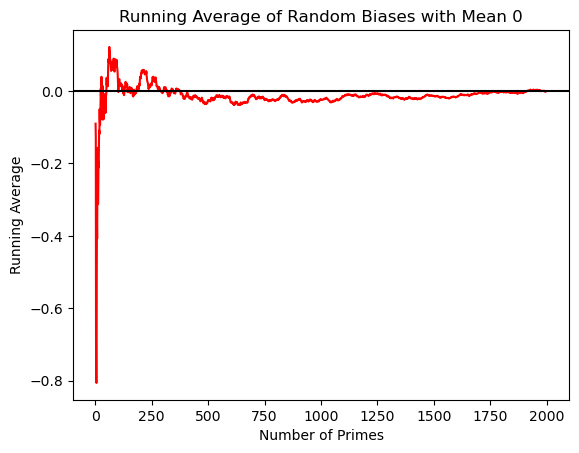

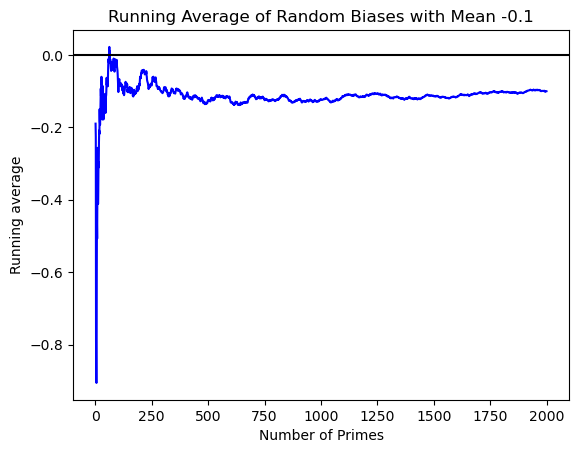

In [45]:
start = 1
plt.plot(range(start,len(bias)), [sum(bias[0: i])/i for i in range(start,len(bias))], color = 'red')
plt.axhline(y=0, color = "black")
plt.title('Running Average of Random Biases with Mean 0')
plt.xlabel("Number of Primes")
plt.ylabel("Running Average")
# plt.ylim([-.2, .2])
plt.savefig(f'{image_path}/unbiased_running_average.png')
plt.show()

plt.plot(range(start,len(bias2)), [sum(bias2[0: i])/i for i in range(start,len(bias))], color="blue")
plt.axhline(y=0, color = "black")
plt.title('Running Average of Random Biases with Mean -0.1')
plt.xlabel("Number of Primes")
plt.ylabel("Running average")
# plt.ylim([-.2, .2])
plt.savefig(f'{image_path}/biased_running_average.png')
plt.show()

### Plotting Zoomed In Running Average Data

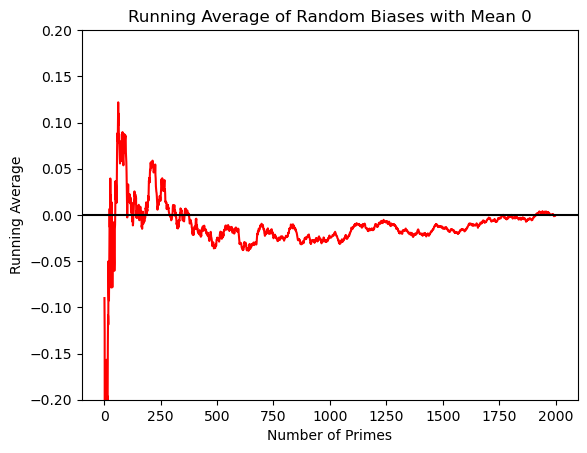

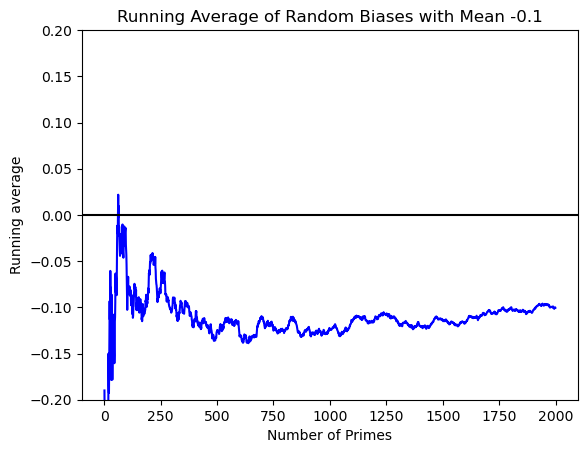

In [46]:
start = 1
plt.plot(range(start,len(bias)), [sum(bias[0: i])/i for i in range(start,len(bias))], color = 'red')
plt.axhline(y=0, color = "black")
plt.title('Running Average of Random Biases with Mean 0')
plt.xlabel("Number of Primes")
plt.ylabel("Running Average")
plt.ylim([-.2, .2])
plt.savefig('Bias_Images/zoom_unbiased_running_average.png')
plt.show()

plt.plot(range(start,len(bias2)), [sum(bias2[0: i])/i for i in range(start,len(bias))], color="blue")
plt.axhline(y=0, color = "black")
plt.title('Running Average of Random Biases with Mean -0.1')
plt.xlabel("Number of Primes")
plt.ylabel("Running average")

plt.ylim([-.2, .2])
plt.savefig('Bias_Images/zoom_biased_running_average.png')
plt.show()

### Plotting Running Average Data Starting at a Later Prime

In [23]:
excision_amt = 500
excised_bias = bias[excision_amt:]
excised_bias2 = bias2[excision_amt:]

In [ ]:
start = 1
plt.plot(range(excision_amt + 1,excision_amt+len(excised_bias2)), [sum(excised_bias2[0: i])/i for i in range(start,len(excised_bias2))], color = 'blue')
plt.axhline(y=0, color = "black")
plt.title('Running Average of Random Biases with Mean -0.1 (Excised)')
plt.xlabel("Number of Primes")
plt.ylabel("Running Average")
# plt.ylim([-.2, .2])
plt.savefig('Bias_Images/excised_biased_running_average.png')
plt.show()

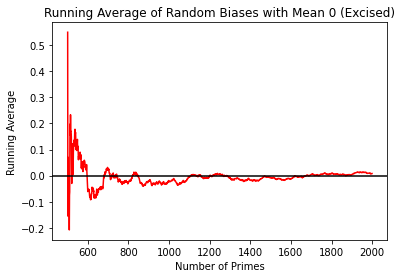

In [27]:
start = 1
plt.plot(range(excision_amt+start,excision_amt+len(excised_bias)), [sum(excised_bias[0: i])/i for i in range(start,len(excised_bias))], color = 'red')
plt.axhline(y=0, color = "black")
plt.title('Running Average of Random Biases with Mean 0 (Excised)')
plt.xlabel("Number of Primes")
plt.ylabel("Running Average")
# plt.ylim([-.2, .2])
plt.savefig('Bias_Images/excised_unbiased_running_average.png')
plt.show()

### Plotting a Lower Order Bias

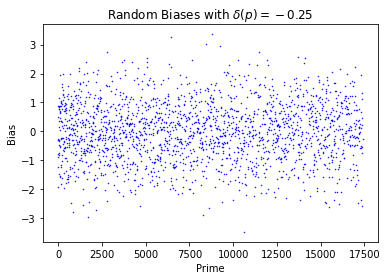

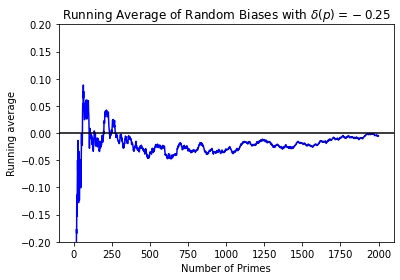

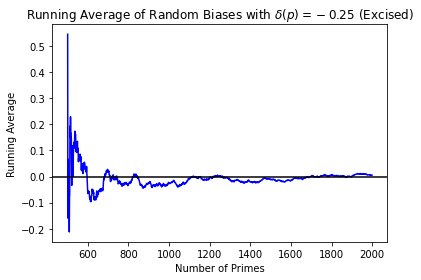

In [29]:
# plt.scatter(primes[:n], np.log(rand2ndMoments), marker = '.', s= 1)
# plt.show()

lowerbias = [rand2ndMoments[j] - 0.25*primes[j] for j in range(n)]
bias = (rand2ndMoments - np.power(primes[:n], 2))/np.power(primes[:n], 1.5)
bias2 = (lowerbias - np.power(primes[:n], 2))/np.power(primes[:n], 1.5)

plt.scatter(primes[:n], bias2, marker = '.', color="blue", s=1)
plt.title('Random Biases with $\delta(p)=-0.25$')
plt.xlabel("Prime")
plt.ylabel("Bias")
plt.savefig('Bias_Images/random_lower_order_bias.png')
plt.show()
start = 1

plt.plot(range(start,len(bias2)), [sum(bias2[0: i])/i for i in range(start,len(bias))], color="blue")
plt.axhline(y=0, color = "black")
plt.title(r'Running Average of Random Biases with $\delta(p)=-0.25$')
plt.xlabel("Number of Primes")
plt.ylabel("Running average")
plt.ylim([-.2, .2])
plt.savefig('Bias_Images/running_random_lower_order_bias.png')
plt.show()

excised_bias2 = bias2[500:]
start = 1
plt.plot(range(excision_amt+start,excision_amt+len(excised_bias2)), [sum(excised_bias2[0: i])/i for i in range(start,len(excised_bias2))], color = 'blue')
plt.axhline(y=0, color = "black")
plt.title('Running Average of Random Biases with $\delta(p)=-0.25$ (Excised)')
plt.xlabel("Number of Primes")
plt.ylabel("Running Average")
# plt.ylim([-.2, .2])
plt.savefig('Bias_Images/excised_running_random_lower_order_bias.png')
plt.show()